DSA 데이터로 트랜스포머 엔코더를 이용한 분류 소스 작성

구성 - 트랜스포터 모델은 특히 순차적 데이터(문장,시계열 데이터)를 처리하는데 뛰어난데, DSA_features.csv의 데이터 특징들을 보면 사람 한명이 센서를 달고 움직임을 저장한 형태이므로 데이터간의 시간적 순서가 중요하므로

데이터 셋을 시계열 데이터로 전처리
트랜스포머 인코더 모델 생성
으로 구성하면 될 것 같다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'/Users/maengjuseog/Desktop/3-2/DeepLearningClass/Data/DSA_features.csv')
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [3]:
# 사람별, 활동별로 그룹화하여 데이터 개수를 세는 코드
activity_count = df.groupby(['people', 'activity']).size().reset_index(name='count')

# 결과 확인
print(activity_count)

    people                 activity  count
0       p1          ascendingStairs     60
1       p1               basketBall     60
2       p1             crossTrainer     60
3       p1        cyclingHorizontal     60
4       p1          cyclingVertical     60
..     ...                      ...    ...
147     p8  standingInElevatorStill     60
148     p8                  stepper     60
149     p8               walkingLot     60
150     p8     walkingTreadmillFlat     60
151     p8  walkingTreadmillIncline     60

[152 rows x 3 columns]


In [4]:
df=df.drop(['people'],axis=1)
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,4.033226e-02,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,2.212497e-02,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,9.656444e-02,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,2.448990e-02,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall


In [5]:
df['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder


# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df['activity'] = label_encoder.fit_transform(df['activity'])

In [8]:
df['activity'].value_counts()

activity
12    480
18    480
6     480
10    480
4     480
3     480
2     480
15    480
11    480
17    480
13    480
16    480
9     480
14    480
5     480
0     480
8     480
7     480
1     480
Name: count, dtype: int64

In [9]:
input = df.drop(['activity'],axis=1)
target = df['activity']

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input,target,test_size=0.2)

x_test,y_test

(      T_xacc_mean  T_xacc_max  T_xacc_min  T_xacc_var  T_xacc_std  \
 8399     8.908082     30.9070    -6.71510  129.994346   11.401506   
 6394     9.629672     13.1950     6.06740    3.201836    1.789368   
 3627     9.014568      9.3929     8.39320    0.055243    0.235039   
 1340    -4.546743     -4.3673    -4.69540    0.004157    0.064473   
 8250     9.678572     24.0560    -7.53360   42.176159    6.494317   
 ...           ...         ...         ...         ...         ...   
 7235     8.456877     10.6760     6.55410    0.468776    0.684672   
 764      9.006567      9.0932     8.91430    0.001241    0.035230   
 3739     0.991902      3.7516    -0.98788    1.623386    1.274122   
 2558     9.500882     18.4640     6.27900    5.570783    2.360251   
 4300     9.661011     14.8650     5.48960    5.952548    2.439784   
 
       T_xacc_skew  T_yacc_mean  T_yacc_max  T_yacc_min  T_yacc_var  ...  \
 8399     0.564387    -2.146690     1.17900   -8.526400    6.064971  ...   
 6394 

In [11]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7296, 270), (1824, 270), (7296,), (1824,))

In [12]:
from sklearn.preprocessing import StandardScaler
# StandardScaler 적용
ss = StandardScaler()
x_train= ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [13]:
from collections import Counter

# timeseries
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # 시퀀스의 끝 인덱스 계산
        end_ix = i + n_steps
        if end_ix > len(sequences):  # 데이터 범위를 넘으면 종료
            break
        
        # 입력과 출력 데이터를 추출
        seq_x = sequences[i:end_ix, :-1]  # 입력 데이터
        seq_y_values = sequences[i:end_ix, -1]  # 해당 구간의 레이블들

        # 가장 빈번한 레이블을 선택
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]

        X.append(seq_x)  # 입력 데이터 추가
        y.append(most_common_label)  # 가장 많이 나온 레이블 추가

    return np.array(X), np.array(y)  # Numpy 배열로 변환하여 반환

In [14]:
# 시계열 데이터로 만들기 위해서 데이터 전처리 과정에서 train test x/y로 나눴는데 
# y(target)을 x(input) 뒤에 붙여줘야 이 함수가 작동함. 시계열에 맞는 새로운 label이 필요하기 때문!

y_train_arr = np.array(y_train)
train_set = np.c_[x_train,y_train]

y_test_arr = np.array(y_test)
test_set = np.c_[x_test,y_test]

In [15]:
n_step=20

x_train,y_train = split_sequences(train_set,n_step)
x_test,y_test = split_sequences(test_set,n_step)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7277, 20, 270), (1805, 20, 270), (7277,), (1805,))

In [16]:
# 정수형 레이블을 벡터로 바꿔주기 원-핫 인코딩

from keras.utils import to_categorical
y_train= to_categorical(y_train)
y_test = to_categorical(y_test)

y_train.shape, y_test.shape

((7277, 19), (1805, 19))

In [17]:
# Produce variables for CNN/LSTM/Transformer input/output shape
n_timesteps, n_features, n_outputs = x_train.shape[1], x_train.shape[2], y_train.shape[1]
print(n_timesteps, n_features, n_outputs)

20 270 19


In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout,MultiHeadAttention,LayerNormalization
from tensorflow.keras.models import Model
import tensorflow.keras as keras
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [28]:
# 하이퍼파라미터 설정
input_shape = (n_timesteps, n_features)  # 시퀀스 길이, 피처 수
n_classes = n_outputs  # 클래스 수
dropout = 0.3 # 드롭아웃 비율


model = build_model(
    input_shape=input_shape,
    head_size=64,
    num_heads=2,
    ff_dim=64,
    num_transformer_blocks=1,
    mlp_units=[64, 32],
    dropout=dropout,
    mlp_dropout=dropout
)

# 모델 요약

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 20, 270)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 20, 270)   │    138,894 │ input_layer_1[0]… │
│ (MultiHeadAttentio… │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 20, 270)   │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 20, 270)   │        540 │ dropout_1[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 20, 270)   │          0 │ layer_normalizat… │
│                     │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 20, 64)    │     17,344 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 20, 64)    │          0 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 20, 270)   │     17,550 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 20, 270)   │        540 │ conv1d_1[0][0]    │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 20, 270)   │          0 │ layer_normalizat… │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 270)       │          0 │ add_1[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │     17,344 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 32)        │      2,080 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 32)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 19)        │        627 │ dropout_4[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 194,919 (761.40 KB)

 Trainable params: 194,919 (761.40 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=30, batch_size=32)

Epoch 1/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.0936 - loss: 2.9517 - val_accuracy: 0.1648 - val_loss: 2.7892
Epoch 2/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.2273 - loss: 2.5432 - val_accuracy: 0.2342 - val_loss: 2.5724
Epoch 3/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.3127 - loss: 2.3184 - val_accuracy: 0.2926 - val_loss: 2.5744
Epoch 4/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.3767 - loss: 2.1202 - val_accuracy: 0.2871 - val_loss: 2.4425
Epoch 5/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4309 - loss: 1.9365 - val_accuracy: 0.3297 - val_loss: 2.3676
Epoch 6/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4765 - loss: 1.7952 - val_accuracy: 0.3530 - val_loss: 2.3605
Epoch 7/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5103 - loss: 1.6884 - val_accuracy: 0.3832 - val_loss: 2.3403
Epoch 8/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5284 - loss: 1.6649 - val_accu

Text(0, 0.5, 'Loss')

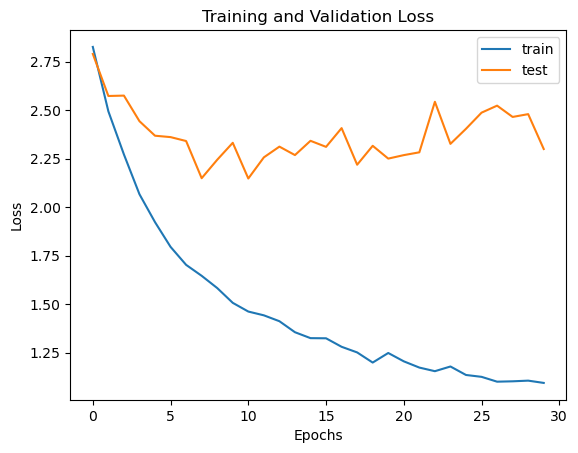

In [30]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

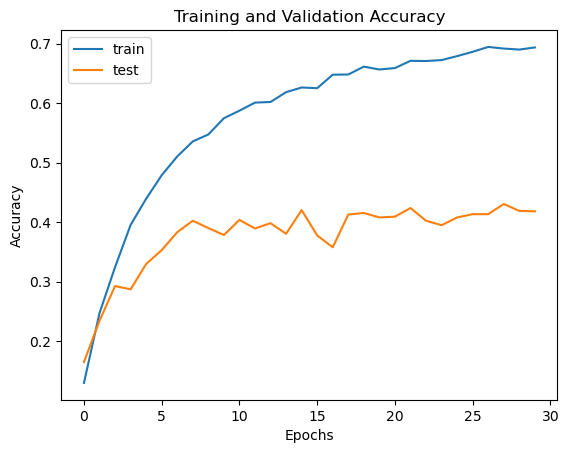

In [31]:
plt.plot(history.history["accuracy"],label="train")
plt.plot(history.history["val_accuracy"],label="test")
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [32]:
model.evaluate(x_test, y_test)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3691 - loss: 2.5394


[2.594431161880493, 0.3556786775588989]

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Confusion Matrix


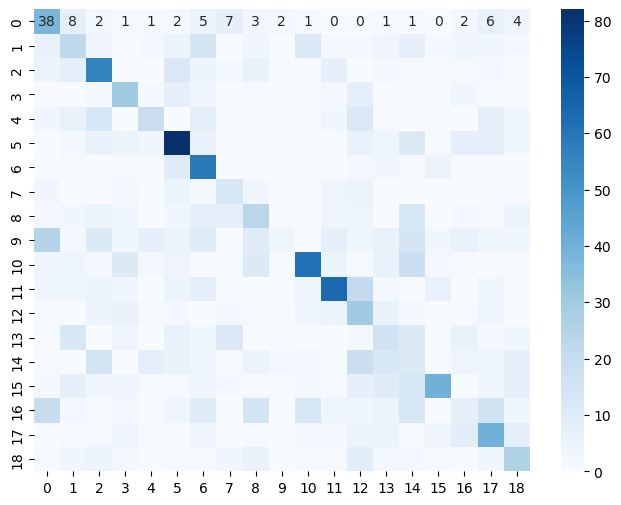

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test, axis=1)
Y_pred = np.argmax(model.predict(x_test),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()

시계열 데이터로 먼저 만들고 train/test, scaling, 훈련 진행해보기

In [34]:
df = pd.read_csv(r'/Users/maengjuseog/Desktop/3-2/DeepLearningClass/Data/DSA_features.csv')
df=df.drop(['people'],axis=1)
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,4.033226e-02,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,2.212497e-02,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,9.656444e-02,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,2.448990e-02,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall


In [35]:
from sklearn.preprocessing import LabelEncoder


# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df['activity'] = label_encoder.fit_transform(df['activity'])
df

input = df.drop(['activity'],axis=1)
target = df['activity']

In [36]:
from collections import Counter

# timeseries
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # 시퀀스의 끝 인덱스 계산
        end_ix = i + n_steps
        if end_ix > len(sequences):  # 데이터 범위를 넘으면 종료
            break
        
        # 입력과 출력 데이터를 추출
        seq_x = sequences[i:end_ix, :-1]  # 입력 데이터
        seq_y_values = sequences[i:end_ix, -1]  # 해당 구간의 레이블들

        # 가장 빈번한 레이블을 선택
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]

        X.append(seq_x)  # 입력 데이터 추가
        y.append(most_common_label)  # 가장 많이 나온 레이블 추가

    return np.array(X), np.array(y)  # Numpy 배열로 변환하여 반환

In [37]:
target = np.array(target)
train_set = np.c_[input,target]

In [38]:
n_steps = 20
input, target = split_sequences(train_set,n_steps)
input.shape, target.shape

((9101, 20, 270), (9101,))

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input,target,test_size=0.2,shuffle=True)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7280, 20, 270), (1821, 20, 270), (7280,), (1821,))

In [40]:
# 정수형 레이블을 벡터로 바꿔주기 원-핫 인코딩

from keras.utils import to_categorical
y_train= to_categorical(y_train)
y_test = to_categorical(y_test)

y_train.shape, y_test.shape

((7280, 19), (1821, 19))

In [41]:
# Produce variables for CNN/LSTM/Transformer input/output shape
n_timesteps, n_features, n_outputs = x_train.shape[1], x_train.shape[2], y_train.shape[1]
print(n_timesteps, n_features, n_outputs)

20 270 19


In [42]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout,MultiHeadAttention,LayerNormalization
from tensorflow.keras.models import Model

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [43]:
# 하이퍼파라미터 설정
input_shape = (n_timesteps, n_features)  # 시퀀스 길이, 피처 수
n_classes = n_outputs  # 클래스 수
dropout = 0.5 # 드롭아웃 비율


model = build_model(
    input_shape=input_shape,
    head_size=64,
    num_heads=3,
    ff_dim=64,
    num_transformer_blocks=3,
    mlp_units=[128, 64],
    dropout=dropout,
    mlp_dropout=dropout
)
# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 20, 270)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 20, 270)   │    208,206 │ input_layer_2[0]… │
│ (MultiHeadAttentio… │                   │            │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 20, 270)   │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 20, 270)   │        540 │ dropout_6[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 20, 270)   │          0 │ layer_normalizat… │
│                     │                   │            │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 20, 64)    │     17,344 │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 20, 64)    │          0 │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 20, 270)   │     17,550 │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 20, 270)   │        540 │ conv1d_3[0][0]    │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 20, 270)   │          0 │ layer_normalizat… │
│                     │                   │            │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 20, 270)   │    208,206 │ add_3[0][0],      │
│ (MultiHeadAttentio… │                   │            │ add_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 20, 270)   │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 20, 270)   │        540 │ dropout_9[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 20, 270)   │          0 │ layer_normalizat… │
│                     │                   │            │ add_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 20, 64)    │     17,344 │ add_4[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 20, 64)    │          0 │ conv1d_4[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 20, 270)   │     17,550 │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 20, 270)   │        540 │ conv1d_5[0][0]    │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 20, 270)   │          0 │ layer_normalizat… │
│                     │                   │            │ add_4[0][0]     

 Total params: 776,719 (2.96 MB)

 Trainable params: 776,719 (2.96 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# 모델 학습
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.2033 - loss: 5.0839 - val_accuracy: 0.5549 - val_loss: 1.4187
Epoch 2/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.4351 - loss: 1.8223 - val_accuracy: 0.6332 - val_loss: 1.0720
Epoch 3/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.4964 - loss: 1.5237 - val_accuracy: 0.6477 - val_loss: 0.8884
Epoch 4/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.5247 - loss: 1.4167 - val_accuracy: 0.7431 - val_loss: 0.7035
Epoch 5/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.5912 - loss: 1.1450 - val_accuracy: 0.8544 - val_loss: 0.5001
Epoch 6/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.6609 - loss: 0.9732 - val_accuracy: 0.8235 - val_loss: 0.4395
Epoch 7/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.6993 - loss: 0.8033 - val_accuracy: 0.8400 - val_loss: 0.3710
Epoch 8/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.7286 - loss: 0.7427 - 

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Confusion Matrix


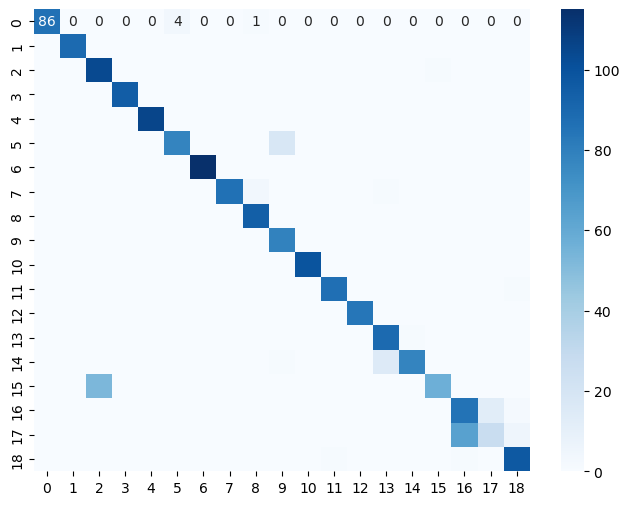

In [45]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test, axis=1)
Y_pred = np.argmax(model.predict(x_test),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()

In [46]:
model.evaluate(x_test,y_test)

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9086 - loss: 0.2667


[0.2916851341724396, 0.8978583216667175]